# 🏠 House Prices - Regression Techniques




## 📚 Bibliotecas

***

Instalação pyspark

In [59]:
!pip install pyspark

Bibliotecas

In [60]:
from pyspark.sql import SparkSession
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import count
import seaborn as sns
from pyspark.sql.functions import col, lit, when, mean
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.sql import functions as F

## 🔋 Carregando Dados
***

Upload do arquivo para o Colab

In [61]:
uploaded = files.upload()

Caminho para o arquivo

In [62]:
file = r'train.csv'

Spark

Inicializando sessão spark

In [63]:
spark = SparkSession.builder. \
        appName("House Price"). \
        getOrCreate()

Definindo esquema manualmente

In [64]:
schema = StructType([
    #Nome da coluna, Tipo dos dados, Condição que permite valores nulos
    StructField("Id", IntegerType(), True),
    StructField("MSSubClass", IntegerType(), True),
    StructField("MSZoning", StringType(), True),
    StructField("LotFrontage", DoubleType(), True),
    StructField("LotArea", DoubleType(), True),
    StructField("Street", StringType(), True),
    StructField("Alley", StringType(), True),
    StructField("LotShape", StringType(), True),
    StructField("LandContour", StringType(), True),
    StructField("Utilities", StringType(), True),
    StructField("LotConfig", StringType(), True),
    StructField("LandSlope", StringType(), True),
    StructField("Neighborhood", StringType(), True),
    StructField("Condition1", StringType(), True),
    StructField("Condition2", StringType(), True),
    StructField("BldgType", StringType(), True),
    StructField("HouseStyle", StringType(), True),
    StructField("OverallQual", IntegerType(), True),
    StructField("OverallCond", IntegerType(), True),
    StructField("YearBuilt", IntegerType(), True),
    StructField("YearRemodAdd", IntegerType(), True),
    StructField("RoofStyle", StringType(), True),
    StructField("RoofMatl", StringType(), True),
    StructField("Exterior1st", StringType(), True),
    StructField("Exterior2nd", StringType(), True),
    StructField("MasVnrType", StringType(), True),
    StructField("MasVnrArea", DoubleType(), True),
    StructField("ExterQual", StringType(), True),
    StructField("ExterCond", StringType(), True),
    StructField("Foundation", StringType(), True),
    StructField("BsmtQual", StringType(), True),
    StructField("BsmtCond", StringType(), True),
    StructField("BsmtExposure", StringType(), True),
    StructField("BsmtFinType1", StringType(), True),
    StructField("BsmtFinSF1", DoubleType(), True),
    StructField("BsmtFinType2", StringType(), True),
    StructField("BsmtFinSF2", DoubleType(), True),
    StructField("BsmtUnfSF", DoubleType(), True),
    StructField("TotalBsmtSF", DoubleType(), True),
    StructField("Heating", StringType(), True),
    StructField("HeatingQC", StringType(), True),
    StructField("CentralAir", StringType(), True),
    StructField("Electrical", StringType(), True),
    StructField("1stFlrSF", DoubleType(), True),
    StructField("2ndFlrSF", DoubleType(), True),
    StructField("LowQualFinSF", DoubleType(), True),
    StructField("GrLivArea", DoubleType(), True),
    StructField("BsmtFullBath", IntegerType(), True),
    StructField("BsmtHalfBath", IntegerType(), True),
    StructField("FullBath", IntegerType(), True),
    StructField("HalfBath", IntegerType(), True),
    StructField("BedroomAbvGr", IntegerType(), True),
    StructField("KitchenAbvGr", IntegerType(), True),
    StructField("KitchenQual", StringType(), True),
    StructField("TotRmsAbvGrd", IntegerType(), True),
    StructField("Functional", StringType(), True),
    StructField("Fireplaces", IntegerType(), True),
    StructField("FireplaceQu", StringType(), True),
    StructField("GarageType", StringType(), True),
    StructField("GarageYrBlt", IntegerType(), True),
    StructField("GarageFinish", StringType(), True),
    StructField("GarageCars", IntegerType(), True),
    StructField("GarageArea", DoubleType(), True),
    StructField("GarageQual", StringType(), True),
    StructField("GarageCond", StringType(), True),
    StructField("PavedDrive", StringType(), True),
    StructField("WoodDeckSF", DoubleType(), True),
    StructField("OpenPorchSF", DoubleType(), True),
    StructField("EnclosedPorch", DoubleType(), True),
    StructField("3SsnPorch", DoubleType(), True),
    StructField("ScreenPorch", DoubleType(), True),
    StructField("PoolArea", DoubleType(), True),
    StructField("PoolQC", StringType(), True),
    StructField("Fence", StringType(), True),
    StructField("MiscFeature", StringType(), True),
    StructField("MiscVal", DoubleType(), True),
    StructField("MoSold", IntegerType(), True),
    StructField("YrSold", IntegerType(), True),
    StructField("SaleType", StringType(), True),
    StructField("SaleCondition", StringType(), True),
    StructField("SalePrice", DoubleType(), True)
])

Carregamento do arquivo CSV

In [65]:
df = spark.read.csv(file, header=True, schema=schema)

Visualização do dados

In [66]:
df.show(10)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

Numero de linhas e colunas

In [67]:
num_colunas = len(df.columns)
num_linhas = df.count()
print(f"Colunas: {num_colunas}")
print(f"Linhas: {num_linhas}")

Colunas: 81
Linhas: 1460


Descrição das colunas

In [68]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: double (nullable = true)
 |-- LotArea: double (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- 

Dados nulos

In [69]:
# Para cada coluna no Dataframe
for colunas in df.columns:
  # Imprime o nome da coluna e o número de linhas com valores nulos
  print(f' {colunas}:  {df.filter(col(colunas).isNull()).count()}')

 Id:  0
 MSSubClass:  0
 MSZoning:  0
 LotFrontage:  259
 LotArea:  0
 Street:  0
 Alley:  0
 LotShape:  0
 LandContour:  0
 Utilities:  0
 LotConfig:  0
 LandSlope:  0
 Neighborhood:  0
 Condition1:  0
 Condition2:  0
 BldgType:  0
 HouseStyle:  0
 OverallQual:  0
 OverallCond:  0
 YearBuilt:  0
 YearRemodAdd:  0
 RoofStyle:  0
 RoofMatl:  0
 Exterior1st:  0
 Exterior2nd:  0
 MasVnrType:  0
 MasVnrArea:  8
 ExterQual:  0
 ExterCond:  0
 Foundation:  0
 BsmtQual:  0
 BsmtCond:  0
 BsmtExposure:  0
 BsmtFinType1:  0
 BsmtFinSF1:  0
 BsmtFinType2:  0
 BsmtFinSF2:  0
 BsmtUnfSF:  0
 TotalBsmtSF:  0
 Heating:  0
 HeatingQC:  0
 CentralAir:  0
 Electrical:  0
 1stFlrSF:  0
 2ndFlrSF:  0
 LowQualFinSF:  0
 GrLivArea:  0
 BsmtFullBath:  0
 BsmtHalfBath:  0
 FullBath:  0
 HalfBath:  0
 BedroomAbvGr:  0
 KitchenAbvGr:  0
 KitchenQual:  0
 TotRmsAbvGrd:  0
 Functional:  0
 Fireplaces:  0
 FireplaceQu:  0
 GarageType:  0
 GarageYrBlt:  81
 GarageFinish:  0
 GarageCars:  0
 GarageArea:  0
 GarageQ

## 🔎 Breve exploração do dados
***

Distribuição dos dados númericos no dataframe

Criando um dataframe novo, somente com colunas de dados númericos

In [70]:
# Acessar os metadados do Dataframe
meta = df.schema.fields
print("Metadata: ", meta)

# Cria uma lista somente com as colunas de tipo IntegerType e DoubleType - Dados númericos
columnList = [field.name for field in meta
                            if isinstance(field.dataType, IntegerType) or isinstance(field.dataType, DoubleType)]
print("Result: ", columnList)

# Cria um novo Dataframe somente de colunas númericas, baseado na lista anterior
df_num = df[[columnList]]
df_num.show(5)

# Número de colunas
print(f"Colunas: {len(df_num.columns)}")

# Número de Linhas
print(f"Linahs: {df_num.count()}")

Metadata:  [StructField('Id', IntegerType(), True), StructField('MSSubClass', IntegerType(), True), StructField('MSZoning', StringType(), True), StructField('LotFrontage', DoubleType(), True), StructField('LotArea', DoubleType(), True), StructField('Street', StringType(), True), StructField('Alley', StringType(), True), StructField('LotShape', StringType(), True), StructField('LandContour', StringType(), True), StructField('Utilities', StringType(), True), StructField('LotConfig', StringType(), True), StructField('LandSlope', StringType(), True), StructField('Neighborhood', StringType(), True), StructField('Condition1', StringType(), True), StructField('Condition2', StringType(), True), StructField('BldgType', StringType(), True), StructField('HouseStyle', StringType(), True), StructField('OverallQual', IntegerType(), True), StructField('OverallCond', IntegerType(), True), StructField('YearBuilt', IntegerType(), True), StructField('YearRemodAdd', IntegerType(), True), StructField('Roof

Gráfico

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

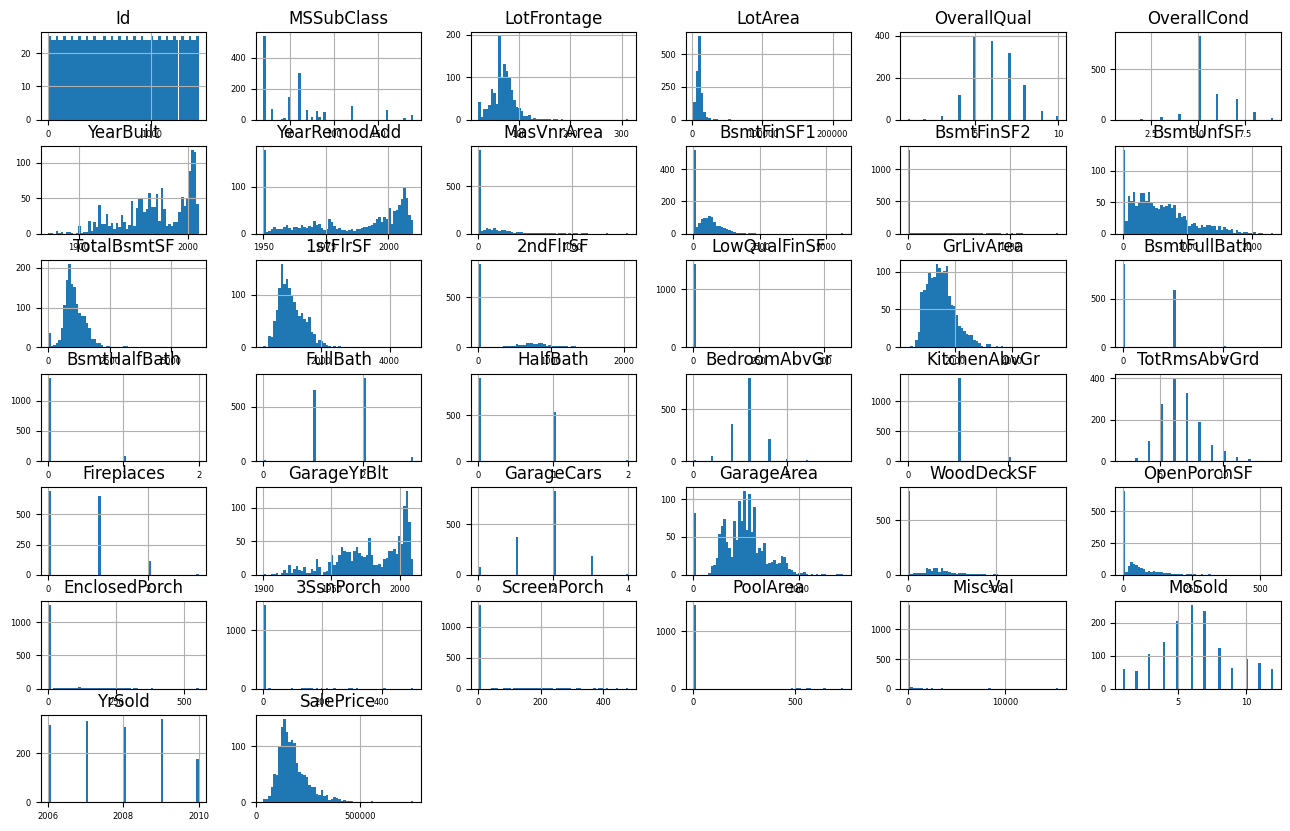

In [71]:
df_num.toPandas().hist(figsize = (16, 10), bins = 60, xlabelsize = 6, ylabelsize = 6)

Descrição da coluna SalePrice

In [72]:
price_summary = df.select("SalePrice").describe().show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|              1460|
|   mean|180921.19589041095|
| stddev| 79442.50288288663|
|    min|           34900.0|
|    max|          755000.0|
+-------+------------------+



Gráfico

<Axes: ylabel='Count'>

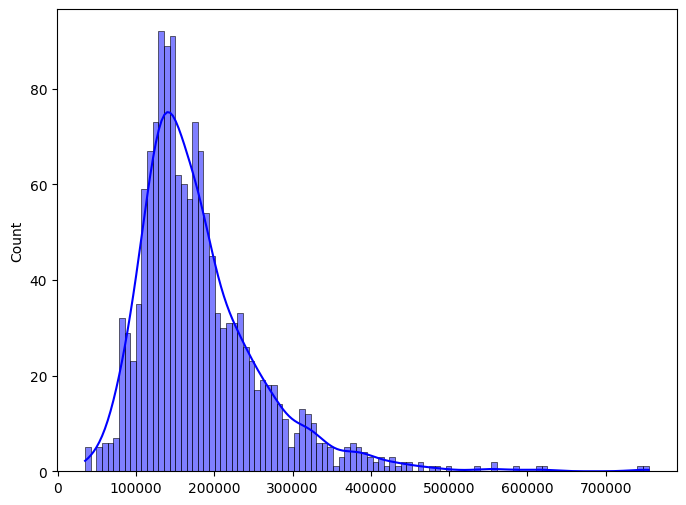

In [73]:
#convertendo uma coluna de um DataFrame PySpark em uma lista Python
price = df.select("SalePrice").rdd.flatMap(lambda x: x).collect()
#Tamanho gráfico
plt.figure(figsize=(8, 6))
#Criar um histograma
sns.histplot(price, color='b', bins=100, kde=True)

## 🧹 Tratamento dos dados
***

Clone do Dataframe

In [74]:
df_clone = df.alias("df_clone")

Codificação de colunas categóricas



In [75]:
#Colunas categóricas
colunas_categoricas = [field.name for field in meta if isinstance(field.dataType, StringType)]

In [76]:
indexers = []

In [77]:
# Itere sobre as colunas categóricas
for coluna in colunas_categoricas:
    # Crie um indexador para cada coluna categórica
    indexer = StringIndexer(inputCol=coluna, outputCol=coluna + "_encoded")

    # Ajuste o indexador aos dados de treinamento
    model = indexer.fit(df_clone)

    # Aplique a codificação à coluna no dataframe original
    df_clone = model.transform(df_clone).drop(coluna)

In [78]:
# O dataframe 'df' agora possui as colunas categóricas codificadas
df_clone.show(10)

+---+----------+-----------+-------+-----------+-----------+---------+------------+----------+----------+----------+---------+-----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+------------+----------+-----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+-------+------+------+---------+----------------+--------------+-------------+----------------+-------------------+-----------------+-----------------+-----------------+--------------------+------------------+------------------+----------------+------------------+-----------------+----------------+-------------------+-------------------+------------------+-----------------+-----------------+------------------+----------------+----------------+--------------------+--------------------+--------------------+---------------+-----------------+------------------+------------------+-------------------+------------------+----

Número de colunas

In [79]:
print(len(df_clone.columns))

81


Tratamento de valores nulos, substituindo valores nulos pelo valor médio daquela coluna

In [80]:
for coluna in df_clone.columns:
  if coluna != 'Id':
    # Calcula a média da coluna atual
    media_coluna = df_clone.agg(mean(col(coluna))).collect()[0][0]

    # Preenche os valores nulos na coluna com a média correspondente
    df_clone = df_clone.withColumn(coluna, when(col(coluna).isNull(), lit(media_coluna)).otherwise(col(coluna)))

Criação de coluna unica chamada Features, utilizada pelo modelo de aprendizagem

In [81]:
colunas_para_selecionar = [coluna for coluna in df_clone.columns if coluna != "Id" and coluna != "SalePrice"]

In [82]:
vector_assembler = VectorAssembler(inputCols=colunas_para_selecionar, outputCol="features")

In [83]:
df_com_features = vector_assembler.transform(df_clone)

In [84]:
df_com_features.show(5)

+---+----------+-----------+-------+-----------+-----------+---------+------------+----------+----------+----------+---------+-----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+------------+----------+-----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+-------+------+------+---------+----------------+--------------+-------------+----------------+-------------------+-----------------+-----------------+-----------------+--------------------+------------------+------------------+----------------+------------------+-----------------+----------------+-------------------+-------------------+------------------+-----------------+-----------------+------------------+----------------+----------------+--------------------+--------------------+--------------------+---------------+-----------------+------------------+------------------+-------------------+------------------+----

Copiando somente as três colunas Id, SalePrice e features em um novo DataFrame

In [85]:
df_features = df_com_features.select("Id", "SalePrice", "features")

In [86]:
df_features.show(5)

+---+---------+--------------------+
| Id|SalePrice|            features|
+---+---------+--------------------+
|  1| 208500.0|(79,[0,1,2,3,4,5,...|
|  2| 181500.0|(79,[0,1,2,3,4,5,...|
|  3| 223500.0|(79,[0,1,2,3,4,5,...|
|  4| 140000.0|(79,[0,1,2,3,4,5,...|
|  5| 250000.0|(79,[0,1,2,3,4,5,...|
+---+---------+--------------------+
only showing top 5 rows



## 🤖 MODELO
***

Criação de um modelo de Random Forest Regressor, features colunas usadas para prever o alvo, SalePrice coluna alvo

In [115]:
rf = RandomForestRegressor(featuresCol="features", labelCol="SalePrice", numTrees=150, maxDepth=20)

Treinamento do modelo

In [116]:
modelo = rf.fit(df_features)

## Dados de teste
***

Carregando arquivos de teste

In [117]:
uploaded = files.upload()

In [118]:
file_test = r'teste.csv'

Schema do Dataframe de teste

In [119]:
schema_test = StructType([
    #Nome da coluna, Tipo dos dados, Condição que permite valores nulos
    StructField("Id", IntegerType(), True),
    StructField("MSSubClass", IntegerType(), True),
    StructField("MSZoning", StringType(), True),
    StructField("LotFrontage", DoubleType(), True),
    StructField("LotArea", DoubleType(), True),
    StructField("Street", StringType(), True),
    StructField("Alley", StringType(), True),
    StructField("LotShape", StringType(), True),
    StructField("LandContour", StringType(), True),
    StructField("Utilities", StringType(), True),
    StructField("LotConfig", StringType(), True),
    StructField("LandSlope", StringType(), True),
    StructField("Neighborhood", StringType(), True),
    StructField("Condition1", StringType(), True),
    StructField("Condition2", StringType(), True),
    StructField("BldgType", StringType(), True),
    StructField("HouseStyle", StringType(), True),
    StructField("OverallQual", IntegerType(), True),
    StructField("OverallCond", IntegerType(), True),
    StructField("YearBuilt", IntegerType(), True),
    StructField("YearRemodAdd", IntegerType(), True),
    StructField("RoofStyle", StringType(), True),
    StructField("RoofMatl", StringType(), True),
    StructField("Exterior1st", StringType(), True),
    StructField("Exterior2nd", StringType(), True),
    StructField("MasVnrType", StringType(), True),
    StructField("MasVnrArea", DoubleType(), True),
    StructField("ExterQual", StringType(), True),
    StructField("ExterCond", StringType(), True),
    StructField("Foundation", StringType(), True),
    StructField("BsmtQual", StringType(), True),
    StructField("BsmtCond", StringType(), True),
    StructField("BsmtExposure", StringType(), True),
    StructField("BsmtFinType1", StringType(), True),
    StructField("BsmtFinSF1", DoubleType(), True),
    StructField("BsmtFinType2", StringType(), True),
    StructField("BsmtFinSF2", DoubleType(), True),
    StructField("BsmtUnfSF", DoubleType(), True),
    StructField("TotalBsmtSF", DoubleType(), True),
    StructField("Heating", StringType(), True),
    StructField("HeatingQC", StringType(), True),
    StructField("CentralAir", StringType(), True),
    StructField("Electrical", StringType(), True),
    StructField("1stFlrSF", DoubleType(), True),
    StructField("2ndFlrSF", DoubleType(), True),
    StructField("LowQualFinSF", DoubleType(), True),
    StructField("GrLivArea", DoubleType(), True),
    StructField("BsmtFullBath", IntegerType(), True),
    StructField("BsmtHalfBath", IntegerType(), True),
    StructField("FullBath", IntegerType(), True),
    StructField("HalfBath", IntegerType(), True),
    StructField("BedroomAbvGr", IntegerType(), True),
    StructField("KitchenAbvGr", IntegerType(), True),
    StructField("KitchenQual", StringType(), True),
    StructField("TotRmsAbvGrd", IntegerType(), True),
    StructField("Functional", StringType(), True),
    StructField("Fireplaces", IntegerType(), True),
    StructField("FireplaceQu", StringType(), True),
    StructField("GarageType", StringType(), True),
    StructField("GarageYrBlt", IntegerType(), True),
    StructField("GarageFinish", StringType(), True),
    StructField("GarageCars", IntegerType(), True),
    StructField("GarageArea", DoubleType(), True),
    StructField("GarageQual", StringType(), True),
    StructField("GarageCond", StringType(), True),
    StructField("PavedDrive", StringType(), True),
    StructField("WoodDeckSF", DoubleType(), True),
    StructField("OpenPorchSF", DoubleType(), True),
    StructField("EnclosedPorch", DoubleType(), True),
    StructField("3SsnPorch", DoubleType(), True),
    StructField("ScreenPorch", DoubleType(), True),
    StructField("PoolArea", DoubleType(), True),
    StructField("PoolQC", StringType(), True),
    StructField("Fence", StringType(), True),
    StructField("MiscFeature", StringType(), True),
    StructField("MiscVal", DoubleType(), True),
    StructField("MoSold", IntegerType(), True),
    StructField("YrSold", IntegerType(), True),
    StructField("SaleType", StringType(), True),
    StructField("SaleCondition", StringType(), True),
    StructField("SalePrice", DoubleType(), True)
])

In [120]:
df_test = spark.read.csv(file_test, header=True, schema=schema_test)

In [121]:
df_test.show(5)

+----+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
|  Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Conditi

In [122]:
df_test_clone = df_test.alias('df_test_clone')

Número de valores nulos em cada coluna

In [123]:
# Para cada coluna no Dataframe
for colunas in df_test_clone.columns:
  # Imprime o nome da coluna e o número de linhas com valores nulos
  print(f' {colunas}:  {df_test_clone.filter(col(colunas).isNull()).count()}')

 Id:  0
 MSSubClass:  0
 MSZoning:  0
 LotFrontage:  227
 LotArea:  0
 Street:  0
 Alley:  0
 LotShape:  0
 LandContour:  0
 Utilities:  0
 LotConfig:  0
 LandSlope:  0
 Neighborhood:  0
 Condition1:  0
 Condition2:  0
 BldgType:  0
 HouseStyle:  0
 OverallQual:  0
 OverallCond:  0
 YearBuilt:  0
 YearRemodAdd:  0
 RoofStyle:  0
 RoofMatl:  0
 Exterior1st:  0
 Exterior2nd:  0
 MasVnrType:  0
 MasVnrArea:  15
 ExterQual:  0
 ExterCond:  0
 Foundation:  0
 BsmtQual:  0
 BsmtCond:  0
 BsmtExposure:  0
 BsmtFinType1:  0
 BsmtFinSF1:  1
 BsmtFinType2:  0
 BsmtFinSF2:  1
 BsmtUnfSF:  1
 TotalBsmtSF:  1
 Heating:  0
 HeatingQC:  0
 CentralAir:  0
 Electrical:  0
 1stFlrSF:  0
 2ndFlrSF:  0
 LowQualFinSF:  0
 GrLivArea:  0
 BsmtFullBath:  2
 BsmtHalfBath:  2
 FullBath:  0
 HalfBath:  0
 BedroomAbvGr:  0
 KitchenAbvGr:  0
 KitchenQual:  0
 TotRmsAbvGrd:  0
 Functional:  0
 Fireplaces:  0
 FireplaceQu:  0
 GarageType:  0
 GarageYrBlt:  78
 GarageFinish:  0
 GarageCars:  1
 GarageArea:  1
 Garage

Substituindo os valores nulos pela média de cada coluna

In [124]:
  for coluna in df_test_clone.columns:
    if coluna != 'Id':
        # Calcula a média da coluna atual
        media_coluna = df_test_clone.agg(mean(col(coluna))).collect()[0][0]

        # Preenche os valores nulos na coluna com a média correspondente
        df_test_clone = df_test_clone.withColumn(coluna, when(col(coluna).isNull(), lit(media_coluna)).otherwise(col(coluna)))

Número de valores nulos em cada coluna

In [125]:
# Para cada coluna no Dataframe
for colunas in df_test_clone.columns:
  # Imprime o nome da coluna e o número de linhas com valores nulos
  print(f' {colunas}:  {df_test_clone.filter(col(colunas).isNull()).count()}')

 Id:  0
 MSSubClass:  0
 MSZoning:  0
 LotFrontage:  0
 LotArea:  0
 Street:  0
 Alley:  0
 LotShape:  0
 LandContour:  0
 Utilities:  0
 LotConfig:  0
 LandSlope:  0
 Neighborhood:  0
 Condition1:  0
 Condition2:  0
 BldgType:  0
 HouseStyle:  0
 OverallQual:  0
 OverallCond:  0
 YearBuilt:  0
 YearRemodAdd:  0
 RoofStyle:  0
 RoofMatl:  0
 Exterior1st:  0
 Exterior2nd:  0
 MasVnrType:  0
 MasVnrArea:  0
 ExterQual:  0
 ExterCond:  0
 Foundation:  0
 BsmtQual:  0
 BsmtCond:  0
 BsmtExposure:  0
 BsmtFinType1:  0
 BsmtFinSF1:  0
 BsmtFinType2:  0
 BsmtFinSF2:  0
 BsmtUnfSF:  0
 TotalBsmtSF:  0
 Heating:  0
 HeatingQC:  0
 CentralAir:  0
 Electrical:  0
 1stFlrSF:  0
 2ndFlrSF:  0
 LowQualFinSF:  0
 GrLivArea:  0
 BsmtFullBath:  0
 BsmtHalfBath:  0
 FullBath:  0
 HalfBath:  0
 BedroomAbvGr:  0
 KitchenAbvGr:  0
 KitchenQual:  0
 TotRmsAbvGrd:  0
 Functional:  0
 Fireplaces:  0
 FireplaceQu:  0
 GarageType:  0
 GarageYrBlt:  0
 GarageFinish:  0
 GarageCars:  0
 GarageArea:  0
 GarageQual

Codificação de colunas categóricas

In [126]:
meta_test = df_test_clone.schema.fields

In [127]:
colunas_categoricas_test = [field.name for field in meta_test if isinstance(field.dataType, StringType)]

In [128]:
indexers = []

In [129]:
# Itere sobre as colunas categóricas
for coluna in colunas_categoricas_test:
    # Crie um indexador para cada coluna categórica
    indexer = StringIndexer(inputCol=coluna, outputCol=coluna + "_encoded")

    # Ajuste o indexador aos dados de treinamento
    model = indexer.fit(df_test_clone)

    # Aplique a codificação à coluna no dataframe original
    df_test_clone = model.transform(df_test_clone).drop(coluna)

In [130]:
print(len(df_test_clone.columns))

81


Criação de coluna unica chamada Features, utilizada pelo modelo de aprendizagem

In [131]:
colunas_para_selecionar = [coluna for coluna in df_test_clone.columns if coluna != "Id" and coluna != "SalePrice"]

In [132]:
vector_assembler = VectorAssembler(inputCols=colunas_para_selecionar, outputCol="features")

In [133]:
df_com_features_test = vector_assembler.transform(df_test_clone)

In [134]:
df_com_features_test.show(truncate=False)

+----+----------+-----------------+-------+-----------+-----------+---------+------------+----------+----------+----------+---------+-----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+------------+----------+-----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+-------+------+------+---------+----------------+--------------+-------------+----------------+-------------------+-----------------+-----------------+-----------------+--------------------+------------------+------------------+----------------+------------------+-----------------+----------------+-------------------+-------------------+------------------+-----------------+-----------------+------------------+----------------+----------------+--------------------+--------------------+--------------------+---------------+-----------------+------------------+------------------+-------------------+----------------

Copiando somente as três colunas Id, SalePrice e features em um novo DataFrame

In [135]:
df_features_test = df_com_features_test.select("Id", "SalePrice", "features")

Teste do modelo

In [136]:
df_predictions_test = modelo.transform(df_features_test)

In [137]:
df_predictions_test.show(5)

+----+---------+--------------------+------------------+
|  Id|SalePrice|            features|        prediction|
+----+---------+--------------------+------------------+
|1461|     null|(79,[0,1,2,3,4,5,...| 126056.7287301587|
|1462|     null|(79,[0,1,2,3,4,5,...|155057.66666666666|
|1463|     null|(79,[0,1,2,3,4,5,...|180525.21517094015|
|1464|     null|(79,[0,1,2,3,4,5,...|184965.22520146522|
|1465|     null|(79,[0,1,2,3,4,5,...|200020.91676767677|
+----+---------+--------------------+------------------+
only showing top 5 rows



Excluindo a coluna 'SalePrice' e 'features'

In [138]:
df_res = df_predictions_test.drop('SalePrice', 'features')

Renomeando a coluna prediction para SalePrice

In [139]:
df_res = df_res.withColumnRenamed("prediction", "SalePrice")

In [140]:
print(df_res.count())

1459


In [141]:
df_res.show(5)

+----+------------------+
|  Id|         SalePrice|
+----+------------------+
|1461| 126056.7287301587|
|1462|155057.66666666666|
|1463|180525.21517094015|
|1464|184965.22520146522|
|1465|200020.91676767677|
+----+------------------+
only showing top 5 rows



Crianção do arquivo Csv

In [142]:
df_res.write.csv('/content/res/res.csv', header=True, mode="overwrite")